In [1]:
#importing the necessary libraries
import selenium
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

### 1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [2]:
#first connecting to the webdriver
driver=webdriver.Chrome("chromedriver.exe")
url=('https://www.amazon.in/')
driver.get(url)

In [3]:
#searching the product in the webpage
search_product=driver.find_element_by_id("twotabsearchtextbox")
search_product.send_keys( input("Enter the product:"))
search_btn=driver.find_element_by_id('nav-search-submit-button')
search_btn.click()

Enter the product:watch


In [4]:
Products=[]
product=driver.find_elements_by_xpath("//div[@class='sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 AdHolder sg-col sg-col-4-of-20' or @class='sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20']")
for i in product:
    Products.append(i.text)

In [5]:
Products

["Sponsored\nDecode\nMatrix Analogue Men's Watch (Black Dial Black Colored Strap)\n499\n₹350\n₹2,199 Save ₹1,849 (84%)\n10% off with Axis Bank Cards\nGet it by Sunday, March 7\nFREE Delivery on your first order in this category",
 "Sponsored\nNIBOSI\nMen's Watches Military Luxury Brand Watch Mens Quartz Stainless Fashion Chronograph Watch Man\n42\n₹2,580\n₹5,160 Save ₹2,580 (50%)\n10% off with Axis Bank Cards\nGet it by Tuesday, March 2\nFREE Delivery by Amazon",
 "Sponsored\nNIBOSI\nMen's Sports Watch Fashion Casual Quartz Analog Wristwatch Stainless Steel Male Clock Waterproof Calendar Date\n10\n₹2,480\n₹4,960 Save ₹2,480 (50%)\n10% off with Axis Bank Cards\nGet it by Wednesday, March 3\nFREE Delivery by Amazon",
 'Sponsored\nhelix\nFull Touch Fitness Smart Watch with HRM, BP, Oxygen Monitor, Music, Camera Control, Message and Call Notification Digital Black Dial Unisex-Adult Watch-TW0HXW101T\n₹3,995\n10% off with Axis Bank Cards\nGet it by Monday, March 8\nFREE Delivery by Amazon',


In [6]:
len(Products)

60

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [7]:
Brand_Name=[]
Product_Name=[]
Rating=[]
No_of_ratings=[]
Price=[]
Expected_Delivery=[]
Availability=[]
Other_details=[]
Product_url=[]
start=0
end=3

In [8]:
#looping for pages
for page in range(start,end):
    #scraping the brand name of the wathes
    try:
        brand=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base']")
        for i in brand:
            if i.text is None :
                Brand_Name.append("-") 
            else:
                Brand_Name.append(i.text)
    except NoSuchElementException as e:
        Brand_Name.append("-")
    
    
    #scraping the product name
    product=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    for i in product:
        if i.text is None :
            Product_Name.append("-") 
        else:
            Product_Name.append(i.text)
    
    #scraping the price details
    try:
        price=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
        for i in price:
            if i.text is None :
                Price.append("-") 
            else:
                Price.append(i.text)
    except NoSuchElementException as e:
        Price.append("-")
        
    #scrapping the urls
    urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in urls:
        Product_url.append(i.get_attribute('href'))
    
    #extracting the rating
    soup= BeautifulSoup(driver.page_source, 'html.parser')
    for d in soup.find_all('div',attrs={'class':'sg-col-inner'}):
        rating=d.find('span', attrs={'class':'a-icon-alt'})
        if rating is not None:
            Rating.append(rating.text)
        else:
            Rating.append("-")
    
        numbers=d.find('span',attrs={'class':'a-size-base'})
        if numbers is not None:
            No_of_ratings.append(numbers.text)
        else:
            No_of_ratings.append("-")
    
     #scrapping expected delivery details
    try:
        delivery=driver.find_elements_by_xpath("//div[@class='a-row s-align-children-center']")
        for i in delivery:
            if i.text is None:
                Expected_Delivery.append("-")
            else:
                Expected_Delivery.append(i.text)
    except NoSuchElementException as e:
        Expected_Delivery.append("-")
    
    #navigating to next_page
    delay=10
    WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.CLASS_NAME,'a-last')))
    next_page=driver.find_element_by_xpath("//li[@class='a-last']")
    next_page.click()
    time.sleep(5)

In [9]:
for url in Product_url:
    driver.get(url)
    time.sleep(3)
        
    #scrapping availability of the product
    try:
        availability=driver.find_elements_by_xpath("//div[@id='availability']/span[1]")
        for i in availability:
            Availability.append(i.text)
    except NoSuchElementException as e:
        Availability.append("-")
                
    #scrapping other details
    try:
        others=driver.find_elements_by_xpath("//div[@id='merchant-info']")
        for i in others:
            Other_details.append(i.text)
    except NoSuchElementException as e:
        Other_details.append("-")
      

In [10]:
print(len(Brand_Name),len(Product_Name),len(Price),len(Product_url),len(Expected_Delivery),len(Availability),len(Other_details),len(Rating),len(No_of_ratings))

187 188 186 188 183 186 186 220 220


### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [27]:
#first connecting to the webdriver
driver=webdriver.Chrome("chromedriver.exe")
url=('https://images.google.com/?gws_rd=ssl')
driver.get(url)

In [28]:
#creating empty lists
fruits=[]
cars=[]
machine_learning=[]
image=[]

In [29]:
#searching for fruits
search_item=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_item.send_keys("fruits")
search_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_btn.click()
time.sleep(5)
fruit_img=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in range(0,3):
    for i in fruit_img:
        if fruit_img is None:
            fruits.append("--")
        else:
            fruits.append(i.get_attribute('src'))
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
fruits=fruits[0:100]

In [31]:
#creating a dataframe
a=pd.DataFrame()
a['img']=fruits
a

,img
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [52]:
#searching for cars
driver.get(url)
search_item=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_item.send_keys("cars")
search_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_btn.click()
time.sleep(5)
for i in range(0,3):
    cars_img=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
    for i in cars_img:
            cars.append(i.get_attribute('src'))
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(5)
cars=cars[0:100]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQjBHWfRvri4hUjmGWPUPCorhGfoTbdRVHSg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLcc1Gf0crJNxlRq3XWcde64adE7tPB3E6mA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSIoSpDCK0vUl2xfwwY4IbhSX9-N_YdEKngKQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUuluiylah2gPDTTVanshgVflDDChQ8mk9Hg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7X_TNzLL4j8hpatJUcU8IHJ8xSNGNcz8mOA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwAgKsI-DaNRqFXoaUJZtmbyq8sCzx7I-83Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpZ_PDUP9riLSxSoep77PZ9biFYtabFd31DQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdFjFEpbZmyNrsIAHUg6KSoWrU36z0kdqtUQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTxpxknxtQJX
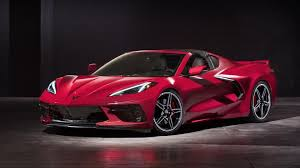
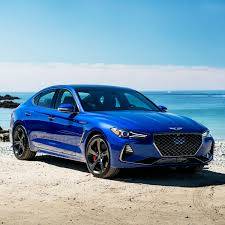
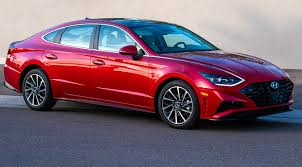
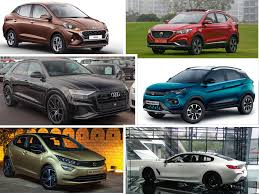
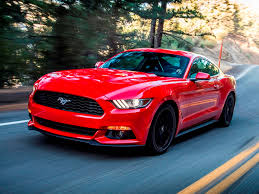
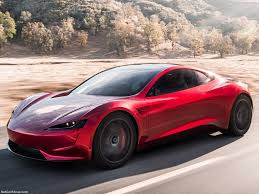
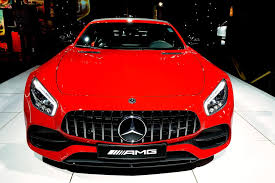
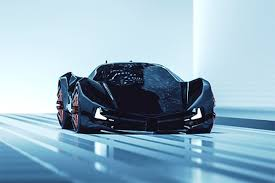
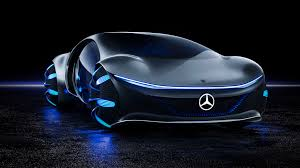
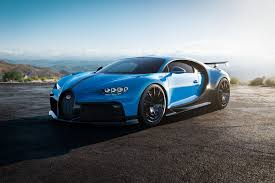
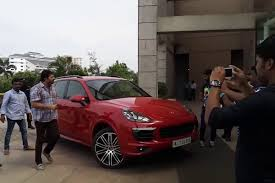
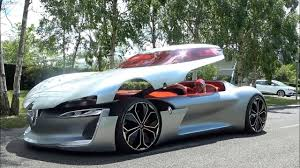
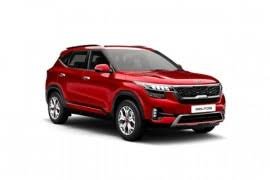
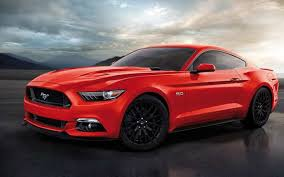
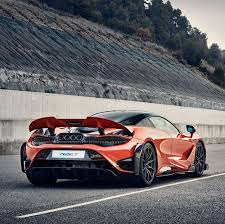
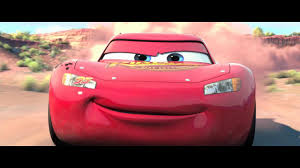
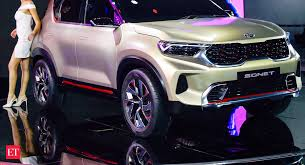
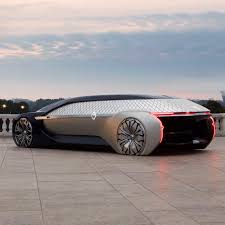
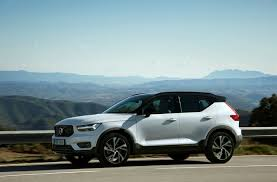
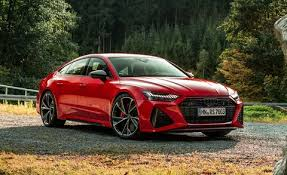
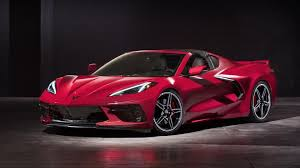
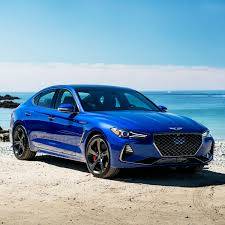
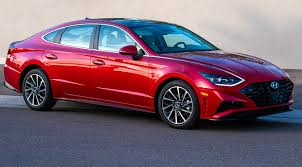
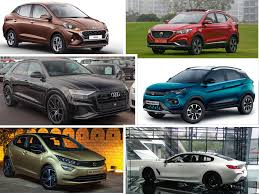
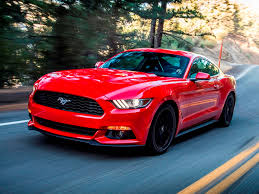
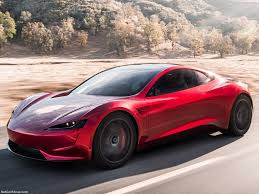
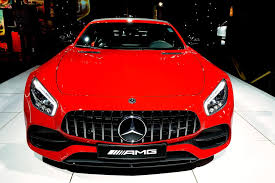
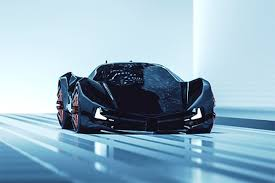
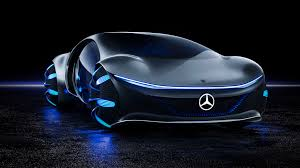
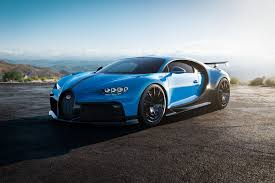
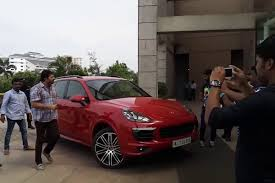
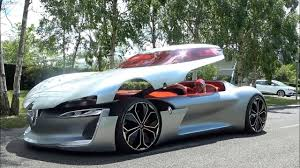
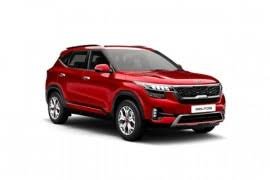
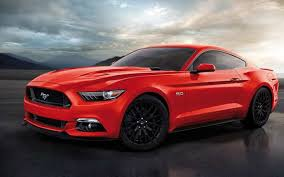
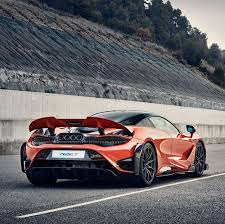
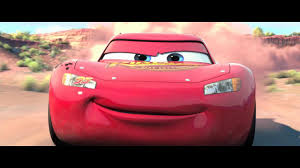
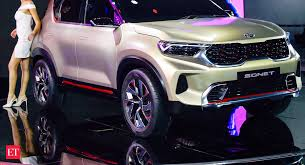
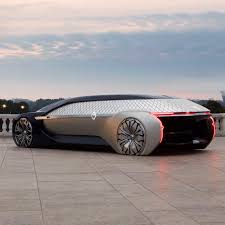
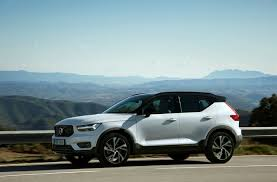
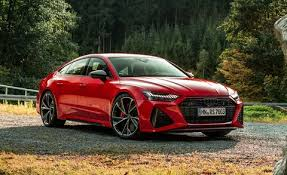
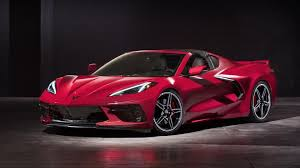
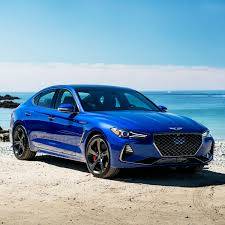

In [53]:
cars

In [49]:
#creating a dataframe
b=pd.DataFrame()
b['img']=cars
b

,img
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...
95,None
96,None
97,None
98,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [55]:
#searching for machine learning
driver.get(url)
search_item=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_item.send_keys("Machine Learning")
search_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_btn.click()
time.sleep(5)
ml_img=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in range(0,3):
    for i in ml_img:
        if ml_img is None:
            machine_learning.append("--")
        else:
            machine_learning.append(i.get_attribute('src'))
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
machine_learning=machine_learning[0:100]

In [56]:
#creating a dataframe
c=pd.DataFrame()
c['img']=machine_learning
c

,img
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [57]:
driver.close()

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [81]:
#first connecting to the webdriver
driver=webdriver.Chrome("chromedriver.exe")
url=('https://www.flipkart.com/')
driver.get(url)

In [82]:
#searching the smartphone
search_product=driver.find_element_by_name("q")
search_product.send_keys( input("Enter the name of the smartphone:"))
search_btn=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_btn.click()

Enter the name of the smartphone:Asus Rog 3


In [135]:
Phone=[]
Display=[]
Camera=[]
Brand_name=[]
Smartphone_name=[]
Colour=[]
memory=[]
RAM=[]
Storage=[]
Primary_camera=[]
Secondary_camera=[]
Display_size=[]
Display_resolution=[]
Processor=[]
Processor_cores=[]
Battery_capacity=[]
Price=[]
Product_url=[]

In [136]:
#extracting brand name
brand=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in brand:
    Phone.append(i.text)
for i in Phone:
    s=i.split(' ')[0]
    p=i.split('(')[0].replace(s,'').strip()
    c=(i.split('(')[1]).split(',')[0]
    Brand_name.append(s)
    Smartphone_name.append(p)
    Colour.append(c)

In [137]:
#extracting memory
mem=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
for i in mem:
    memory.append(i.text)
for i in memory:
    q=i.split('|')[0]
    r=i.split('|')[1]
    RAM.append(q)
    Storage.append(r)    

In [138]:
#extracting display 
display=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
for i in display:
    Display.append(i.text)
for i in Display:
    u=i.split('(')[0]
    v=i.split(')')[1]
    Display_size.append(u)
    Display_resolution.append(v)

In [139]:
#extracting camera
cam=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
for i in cam:
    Camera.append(i.text)
for i in Camera:
    w=i.split('|')[1]
    x=i.split('|')[0]
    Primary_camera.append(w)
    Secondary_camera.append(x)    

In [140]:
#extracting battery details
battery=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
for i in battery:
    Battery_capacity.append(i.text)

#extracting processor details
processor=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[5]")
for i in processor:
    Processor.append(i.text)
# no details of processor core hence append it by '-'
for i in range (0,6):
    Processor_cores.append("-")

#extracting the price
price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    Price.append(i.text)

#extracting product url
url=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in url:
    Product_url.append(i.get_attribute('href'))

In [141]:
#Now creating a dataframe
Phones=pd.DataFrame()
Phones['Brand']=Brand_name
Phones['Name']=Smartphone_name
Phones['colour']=Colour
Phones['Ram']=RAM
Phones['Storage']=Storage
Phones['Primary_camera']=Primary_camera
Phones['Secondary_camera']=Secondary_camera
Phones['Display_size']=Display_size
Phones['Display_resolution']=Display_resolution
Phones['Battery']=Battery_capacity
Phones['Processor']=Processor
Phones['Processor_cores']=Processor_cores
Phones['Price']=Price
Phones['Product_url']=Product_url
Phones

,Brand,Name,colour,Ram,Storage,Primary_camera,Secondary_camera,Display_size,Display_resolution,Battery,Processor,Processor_cores,Price,Product_url
0,Asus,ROG Phone 3,Black,12 GB RAM,128 GB ROM,24MP Front Camera,64MP + 13MP + 5MP,16.74 cm,Full HD+ Display,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 865+ (SM8250) Processor,-,"₹47,999",https://www.flipkart.com/asus-rog-phone-3-blac...
1,Asus,ROG Phone 3,Black,8 GB RAM,128 GB ROM,24MP Front Camera,64MP + 13MP + 5MP,16.74 cm,Full HD+ Display,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 865+ (SM8250) Processor,-,"₹43,999",https://www.flipkart.com/asus-rog-phone-3-blac...
2,Asus,ROG Phone 3,Black,12 GB RAM,256 GB ROM,24MP Front Camera,64MP + 13MP + 5MP,16.74 cm,Full HD+ Display,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 865+ (SM8250) Processor,-,"₹54,999",https://www.flipkart.com/asus-rog-phone-3-blac...
3,Asus,ROG Phone II,Black,8 GB RAM,128 GB ROM,24MP Front Camera,48MP + 13MP,16.74 cm,Full HD+ Display,6000 mAh Battery,Qualcomm Snapdragon 855 Plus Processor,-,"₹39,999",https://www.flipkart.com/asus-rog-phone-ii-bla...
4,Asus,ROG Phone II,Black,12 GB RAM,512 GB ROM,24MP Front Camera,48MP + 13MP,16.74 cm,Full HD+ Display,6000 mAh Battery,Qualcomm Snapdragon 855 Plus Processor,-,"₹59,999",https://www.flipkart.com/asus-rog-phone-ii-bla...
5,Asus,ROG,Black,8 GB RAM,128 GB ROM,8MP Front Camera,12MP + 8MP,15.24 cm,Full HD+ Display,4000 mAh Battery,Qualcomm Speed-binned Snapdragon 845 Processor,-,"₹26,499",https://www.flipkart.com/asus-rog-black-128-gb...


In [142]:
#saving the dataframe to csv
Phones.to_csv('Phone details.csv')

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [174]:
#first connecting to the webdriver
driver=webdriver.Chrome("chromedriver.exe")
url=('https://www.google.com/maps')
driver.get(url)

In [175]:
location=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
location.send_keys(input("Enter the city:"))
button=driver.find_element_by_xpath("//div[@class='searchbox-searchbutton-container']")
button.click()


Enter the city:Mumbai


### 7. Write a program to scrap all the available details of top 10 gaming laptops from digit.in. 

In [166]:
#first connecting to the webdriver
driver=webdriver.Chrome("chromedriver.exe")
url=('https://www.digit.in/')
driver.get(url)

In [167]:
search=driver.find_element_by_xpath("//div[@class='search']")
search.click()

In [169]:
from selenium.webdriver.common.keys import Keys
search_item=driver.find_element_by_xpath("//input[@id='globalPageSearchText']")
search_item.send_keys("gaming laptops")
WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//input[@id='globalPageSearchText']"))).send_keys(keys.ENTER)

AttributeError: 'str' object has no attribute 'ENTER'